# Dataset y conjuntos.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
# Dataset- dataframe
#División en conjunto de entrenamiento y de test.
url = 'https://raw.githubusercontent.com/joinerhs/Simulacion_final/master/SeoulBikeData.csv'  #En esta dirección está el dataset.

df = pd.read_csv(url, encoding = "ISO-8859-1") 

train, test = train_test_split(df, test_size = 0.20)



# Imports

In [2]:
#Imports.
import numpy as np
import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)
# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")


In [3]:
train.shape, test.shape #Dimensiones de los conjuntos de entrenamiento y test.

((7008, 14), (1752, 14))

In [4]:
train

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
655,28/12/2017,257,7,-5.0,31,0.5,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
3724,05/05/2018,252,4,12.1,51,1.6,1939,2.2,0.00,0.0,0.0,Spring,No Holiday,Yes
52,03/12/2017,76,4,3.5,73,1.0,1060,-0.8,0.00,0.0,0.0,Winter,No Holiday,Yes
790,02/01/2018,273,22,-3.4,33,2.4,2000,-17.4,0.00,0.0,0.0,Winter,No Holiday,Yes
1928,19/02/2018,646,8,-1.2,51,0.8,1800,-10.0,0.05,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,15/02/2018,145,22,-1.9,30,0.8,2000,-17.2,0.00,0.0,0.0,Winter,Holiday,Yes
2831,28/03/2018,614,23,13.5,74,1.2,603,8.9,0.00,0.0,0.0,Spring,No Holiday,Yes
1078,14/01/2018,196,22,2.8,60,0.6,829,-4.2,0.00,0.0,0.0,Winter,No Holiday,Yes
2550,17/03/2018,109,6,0.8,63,1.0,2000,-5.4,0.00,0.0,0.0,Spring,No Holiday,Yes


## Preselección.

In [ ]:
array = train.values
labelencoder_X = LabelEncoder()
array[:,10] = labelencoder_X.fit_transform(array[:,10])
array[:,11] = labelencoder_X.fit_transform(array[:,11])
array[:,12] = labelencoder_X.fit_transform(array[:,12])
db = pd.DataFrame(array)
db


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1007,19,2.9,26,1.1,2000,-14.7,0,0,0,0,1,1
1,308,11,-0.7,45,1.5,1429,-11.1,0.76,0,0,3,1,1
2,1106,9,8.6,50,0.8,1785,-1.2,1.13,0,0,0,1,1
3,306,22,-3.6,46,1.3,1689,-13.5,0,0,0,3,1,1
4,188,8,5.1,83,0.9,297,2.4,0,0,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,78,10,18.4,96,2,1124,17.7,0.32,1,0,0,1,1
7004,2092,18,36.2,45,2,2000,22.3,0.65,0,0,2,1,1
7005,1101,17,4.9,41,3.3,1985,-7.2,0.25,0,0,0,1,1
7006,938,13,29.4,42,1.7,689,15.1,3.1,0,0,2,1,1


In [ ]:
#Muestras
db.values

array([[1007, 19, 2.9, ..., 0, 1, 1],
       [308, 11, -0.7, ..., 3, 1, 1],
       [1106, 9, 8.6, ..., 0, 1, 1],
       ...,
       [1101, 17, 4.9, ..., 0, 1, 1],
       [938, 13, 29.4, ..., 2, 1, 1],
       [2266, 17, 27.4, ..., 2, 1, 1]], dtype=object)

In [ ]:
#Información
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7008 entries, 8587 to 5273
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            7008 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           7008 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    7008 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            7008 non-null   ob

In [ ]:
# Differentiate numerical features (minus the target) and categorical features
# Categorical features
categorical_features = train.select_dtypes(include=['object']).columns
categorical_features

Index(['Date', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
# Numerical features
numerical_features = train.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [ ]:
train['Rented Bike Count'].describe()

count    7008.000000
mean      709.576056
std       649.119603
min         0.000000
25%       190.000000
50%       509.000000
75%      1074.250000
max      3418.000000
Name: Rented Bike Count, dtype: float64

*Hay un promedio de 705 bicicletas rentadas por hora.*

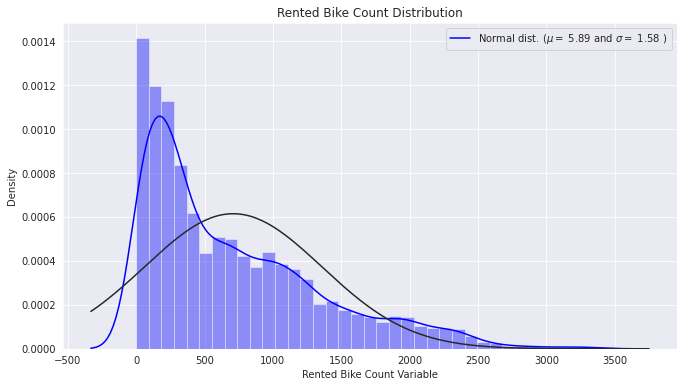

In [ ]:
sns.set_style('darkgrid')
plt.subplots(figsize=(11, 6))
sns.distplot(train['Rented Bike Count'], color="b", fit=norm)
(Mu, Sigma) = norm.fit(np.log1p(train["Rented Bike Count"]))
plt.title("Rented Bike Count Distribution")
plt.xlabel("Rented Bike Count Variable")
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(Mu, Sigma)],
            loc='best')
plt.show()

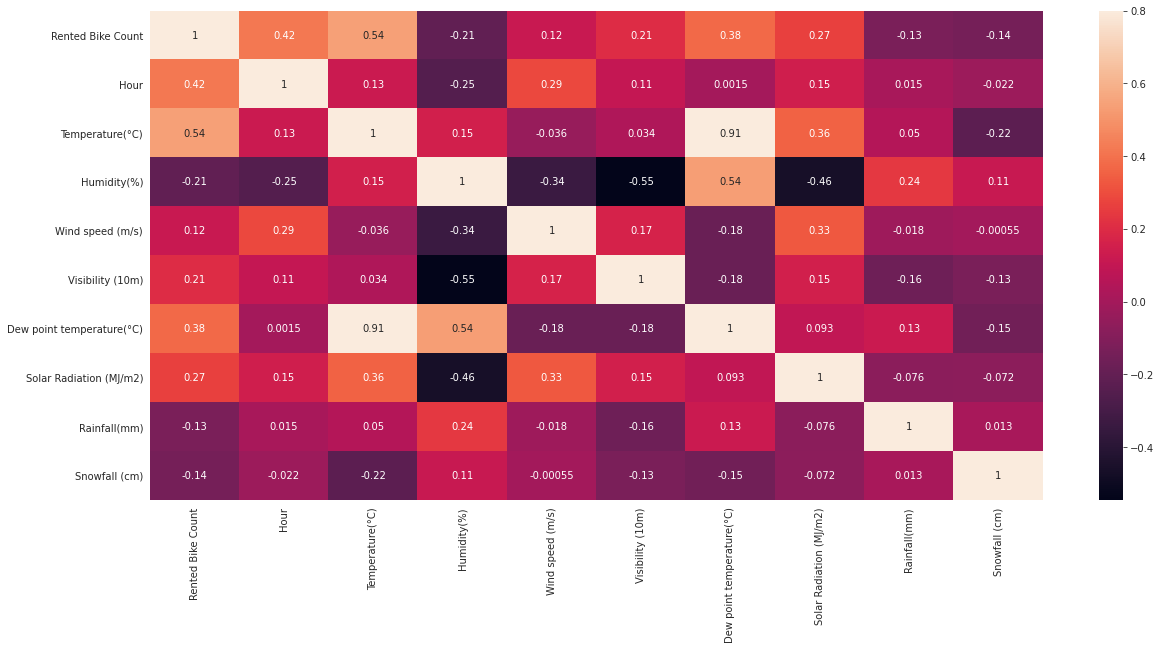

In [ ]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

 Podemos notar que hay una alta correlación entre la característica "Dew point temperature" y "temperature" con nuestra variable respuesta que es el número de bicicletas rentadas por hora, por ende son candidatas a descartar

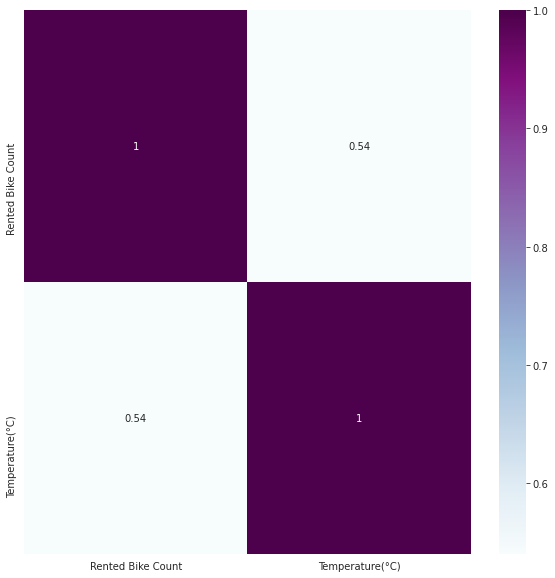

In [ ]:

# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["Rented Bike Count"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True, cmap="BuPu")

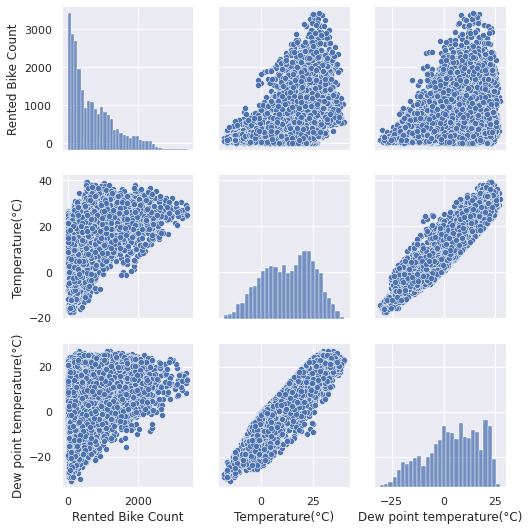

In [ ]:
sns.set()
cols = ['Rented Bike Count', 'Temperature(°C)', 'Dew point temperature(°C)']
sns.pairplot(train[cols], size = 2.5)
plt.show();

## Acá corroboramos que no hay valores faltantes.

[Text(0, 0.5, 'Percent of missing values')]

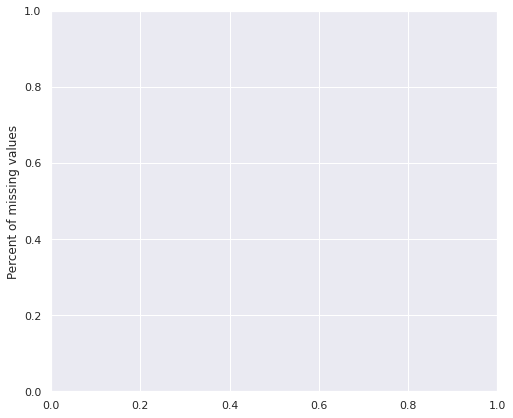

In [ ]:
# Missing values plot
f, ax = plt.subplots(figsize=(8, 7))
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
ax.set(ylabel="Percent of missing values")

In [ ]:

#Percent of missing values in test dataset

testMV = test.isna().mean().round(4) * 100
testMV.sort_values(ascending=False).head(20)

Functioning Day              0.0
Holiday                      0.0
Seasons                      0.0
Snowfall (cm)                0.0
Rainfall(mm)                 0.0
Solar Radiation (MJ/m2)      0.0
Dew point temperature(°C)    0.0
Visibility (10m)             0.0
Wind speed (m/s)             0.0
Humidity(%)                  0.0
Temperature(°C)              0.0
Hour                         0.0
Rented Bike Count            0.0
Date                         0.0
dtype: float64

In [ ]:
dataframe = pd.DataFrame(db)
dataframe.columns = ['Rented Bike Count', 'Hour',	'Temperature(°C)',	'Humidity(%)'	,'Wind speed (m/s)',	'Visibility (10m)',	'Dew point temperature(°C)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)',	'Seasons',	'Holiday',	'Functioning Day']
dataframe

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1007,19,2.9,26,1.1,2000,-14.7,0,0,0,0,1,1
1,308,11,-0.7,45,1.5,1429,-11.1,0.76,0,0,3,1,1
2,1106,9,8.6,50,0.8,1785,-1.2,1.13,0,0,0,1,1
3,306,22,-3.6,46,1.3,1689,-13.5,0,0,0,3,1,1
4,188,8,5.1,83,0.9,297,2.4,0,0,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,78,10,18.4,96,2,1124,17.7,0.32,1,0,0,1,1
7004,2092,18,36.2,45,2,2000,22.3,0.65,0,0,2,1,1
7005,1101,17,4.9,41,3.3,1985,-7.2,0.25,0,0,0,1,1
7006,938,13,29.4,42,1.7,689,15.1,3.1,0,0,2,1,1


In [ ]:
db

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1007,19,2.9,26,1.1,2000,-14.7,0,0,0,0,1,1
1,308,11,-0.7,45,1.5,1429,-11.1,0.76,0,0,3,1,1
2,1106,9,8.6,50,0.8,1785,-1.2,1.13,0,0,0,1,1
3,306,22,-3.6,46,1.3,1689,-13.5,0,0,0,3,1,1
4,188,8,5.1,83,0.9,297,2.4,0,0,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,78,10,18.4,96,2,1124,17.7,0.32,1,0,0,1,1
7004,2092,18,36.2,45,2,2000,22.3,0.65,0,0,2,1,1
7005,1101,17,4.9,41,3.3,1985,-7.2,0.25,0,0,0,1,1
7006,938,13,29.4,42,1.7,689,15.1,3.1,0,0,2,1,1


In [ ]:
# making the input and target features
y = db['Rented Bike Count'].values
X = db.drop(['Rented Bike Count'], axis = 1)

In [ ]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,19,2.9,26,1.1,2000,-14.7,0,0,0,0,1,1
1,11,-0.7,45,1.5,1429,-11.1,0.76,0,0,3,1,1
2,9,8.6,50,0.8,1785,-1.2,1.13,0,0,0,1,1
3,22,-3.6,46,1.3,1689,-13.5,0,0,0,3,1,1
4,8,5.1,83,0.9,297,2.4,0,0,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7003,10,18.4,96,2,1124,17.7,0.32,1,0,0,1,1
7004,18,36.2,45,2,2000,22.3,0.65,0,0,2,1,1
7005,17,4.9,41,3.3,1985,-7.2,0.25,0,0,0,1,1
7006,13,29.4,42,1.7,689,15.1,3.1,0,0,2,1,1


In [ ]:
y

array([1007, 308, 1106, ..., 1101, 938, 2266], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=310)

In [ ]:
def MAPE(Y_est,Y):
    ind = Y != 0 #Remueve los elementos que son cero en la variable deseada
    N = np.size(Y[ind])
    mape = np.sum(abs((Y_est[ind].reshape(N,1) - Y[ind].reshape(N,1))/(Y[ind].reshape(N,1)+np.finfo(np.float).eps)))/N
    return mape

In [ ]:
from sklearn.linear_model import LinearRegression

# Regresión Múltiple

In [ ]:
lr_multiple = LinearRegression()
# fitting the model with the training dataset
lr_multiple.fit(X_train, y_train)
# predicting the values
predicted_value = lr_multiple.predict(X_test)
print('Precisión del modelo:')


# calculating the accuracy
rmse_after_cleaning = mean_squared_error(predicted_value, y_test)
mape= MAPE(predicted_value, y_test)

print('RSME: ', np.sqrt(rmse_after_cleaning))
print('SME: ', rmse_after_cleaning)
print('MAPE: ', mape)

Precisión del modelo:
RSME:  438.97879256967383
SME:  192702.38032592874
MAPE:  1.5146317906912403


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
parameters = {
            'n_estimators' : [100,1000,1100],
            'max_depth' : [15,18,20]
             }
grid_search_cv = GridSearchCV(RandomForestRegressor(), parameters)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
grid_search_cv.best_params_

{'max_depth': 18, 'n_estimators': 1000}

In [ ]:
rf = RandomForestRegressor(n_estimators=1100,
                          max_depth=15)

# fitting the model with the training dataset
rf.fit(X_train, y_train)
# predicting the values
predicted_value = rf.predict(X_test)

# calculating the accuracy
rmse_after_cleaning = mean_squared_error(predicted_value, y_test)
mape= MAPE(predicted_value, y_test)

print('RSME: ', np.sqrt(rmse_after_cleaning))
print('SME: ', rmse_after_cleaning)
print('MAPE: ', mape)

RSME:  237.39021523572663
SME:  56354.11428966461
MAPE:  0.5148131035101623


In [ ]:
X_test.isnull().sum()

Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
SalePriceRF = rf.predict(X_test)

# Redes Neuronales Artificiales

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
parameters = {
            'random_state' : [1,2,3,4,5,6,7,8,9,10],
            'max_iter' : [100, 200, 300, 400, 500],
            'activation':['identity', 'logistic', 'tanh', 'relu'],
            #'solver' : ['lbfgs', 'sgd', 'adam'],
            'learning_rate' :['constant', 'invscaling', 'adaptive']
             }
grid_search_cv = GridSearchCV(MLPRegressor(), parameters)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'learning_

In [ ]:
grid_search_cv.best_params_

{'activation': 'relu',
 'learning_rate': 'constant',
 'max_iter': 500,
 'random_state': 4}

In [ ]:
regr = MLPRegressor(random_state=8, max_iter=300, activation = 'logistic', learning_rate = 'constant').fit(X_train, y_train)
predicted_value = regr.predict(X_test)

rmse_after_cleaning = np.sqrt(mean_squared_error(predicted_value, y_test))
mape= MAPE(predicted_value, y_test)

print('RSME: ', np.sqrt(rmse_after_cleaning))
print('SME: ', rmse_after_cleaning)
print('MAPE: ', mape)

RSME:  25.199084206280027
SME:  634.9938448351916
MAPE:  1.1574398094512477


# SVR

In [ ]:

from sklearn.svm import SVR

In [ ]:
parameters = {
            'epsilon': [0.004, 0.008, 0.0005, 0.0008]
             }
grid_search_cv = GridSearchCV(SVR(), parameters)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'epsilon': [0.004, 0.008, 0.0005, 0.0008]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(kernel='rbf', epsilon= 0.008))

# fitting the model with the training dataset
svr.fit(X_train, y_train)
# predicting the values
predicted_value = svr.predict(X_test)

# calculating the accuracy
rmse_after_cleaning = mean_squared_error(predicted_value, y_test)
mape= MAPE(predicted_value, y_test)

print('RSME: ', np.sqrt(rmse_after_cleaning))
print('SME: ', rmse_after_cleaning)
print('MAPE: ', mape)

RSME:  560.4920163553899
SME:  314151.30039813067
MAPE:  1.5221711117764964
